In [1]:
import tensorflow as tf 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import keras 
from keras.models import Sequential 
from keras.layers import Dense 
from sklearn.metrics import confusion_matrix
import gradio as gr
import seaborn as sns

In [2]:
#loading data
data = pd.read_csv("F:\\datasets\\heart_failure_clinical_records_dataset.csv")
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [3]:
data.shape                    #here 0=not dead , 1=dead

(299, 13)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [5]:
data.describe() 

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [6]:
data.isnull().any()

age                         False
anaemia                     False
creatinine_phosphokinase    False
diabetes                    False
ejection_fraction           False
high_blood_pressure         False
platelets                   False
serum_creatinine            False
serum_sodium                False
sex                         False
smoking                     False
time                        False
DEATH_EVENT                 False
dtype: bool

<Axes: xlabel='DEATH_EVENT', ylabel='count'>

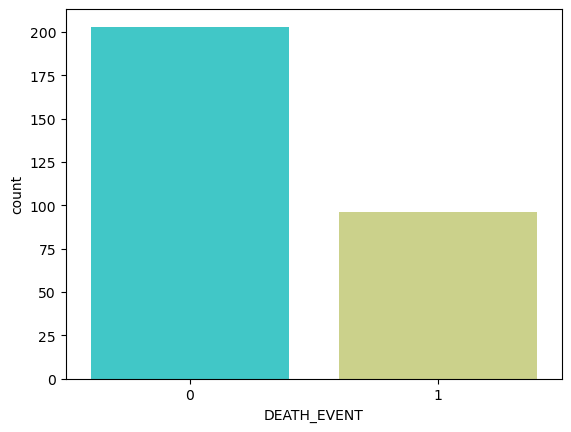

In [7]:
#first of all let us evaluate the target and find out if our data is imbalanced or not
sns.countplot(x= data["DEATH_EVENT"], palette= "rainbow")

In [8]:
#assigning values to features as X and target as y
X=data.drop(["DEATH_EVENT"],axis=1)
y=data["DEATH_EVENT"]

In [9]:
#spliting test and training sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [10]:
#Scale the data.
from sklearn.preprocessing import StandardScaler 
sc = StandardScaler() 
X_train = sc.fit_transform(X_train) 
X_test = sc.transform(X_test) 

In [11]:
# Initialising the NN
import keras
from keras.models import Sequential
from keras.layers import Dense , Dropout
model = Sequential()

In [12]:
model = Sequential()
model.add(Dense(units=15, activation='relu', kernel_initializer='glorot_uniform', input_dim=12))
model.add(Dropout(rate=0.1))
model.add(Dense(units=12, activation='relu', kernel_initializer='glorot_uniform'))
model.add(Dropout(rate=0.1))
model.add(Dense(units=1, activation='sigmoid'))


In [13]:
# Compiling the ANN
#model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
model.compile(optimizer='adam' , loss='binary_crossentropy' , metrics=['accuracy'])

In [14]:
# Train the ANN
model.fit(X_train, y_train, batch_size=32 , epochs = 100)    

Epoch 1/100


8/8 [==============================] - 5s 11ms/step - loss: 0.9291 - accuracy: 0.3808
Epoch 2/100
8/8 [==============================] - 0s 6ms/step - loss: 0.8474 - accuracy: 0.4351
Epoch 3/100
8/8 [==============================] - 0s 6ms/step - loss: 0.8036 - accuracy: 0.4728
Epoch 4/100
8/8 [==============================] - 0s 6ms/step - loss: 0.7407 - accuracy: 0.5439
Epoch 5/100
8/8 [==============================] - 0s 7ms/step - loss: 0.7172 - accuracy: 0.5230
Epoch 6/100
8/8 [==============================] - 0s 7ms/step - loss: 0.6779 - accuracy: 0.5732
Epoch 7/100
8/8 [==============================] - 0s 6ms/step - loss: 0.6263 - accuracy: 0.6611
Epoch 8/100
8/8 [==============================] - 0s 7ms/step - loss: 0.6615 - accuracy: 0.5983
Epoch 9/100
8/8 [==============================] - 0s 7ms/step - loss: 0.5922 - accuracy: 0.6695
Epoch 10/100
8/8 [==============================] - 0s 6ms/step - loss: 0.5884 - accuracy: 0.7071
Epoch 11/100
8/8 [========

8/8 [==============================] - 0s 6ms/step - loss: 0.3462 - accuracy: 0.8494
Epoch 81/100
8/8 [==============================] - 0s 6ms/step - loss: 0.3140 - accuracy: 0.8661
Epoch 82/100
8/8 [==============================] - 0s 6ms/step - loss: 0.3313 - accuracy: 0.8745
Epoch 83/100
8/8 [==============================] - 0s 6ms/step - loss: 0.3021 - accuracy: 0.8703
Epoch 84/100
8/8 [==============================] - 0s 6ms/step - loss: 0.3376 - accuracy: 0.8494
Epoch 85/100
8/8 [==============================] - 0s 7ms/step - loss: 0.3606 - accuracy: 0.8577
Epoch 86/100
8/8 [==============================] - 0s 6ms/step - loss: 0.3653 - accuracy: 0.8326
Epoch 87/100
8/8 [==============================] - 0s 6ms/step - loss: 0.3331 - accuracy: 0.8452
Epoch 88/100
8/8 [==============================] - 0s 6ms/step - loss: 0.3345 - accuracy: 0.8619
Epoch 89/100
8/8 [==============================] - 0s 6ms/step - loss: 0.3225 - accuracy: 0.8619
Epoch 90/100
8/8 [===============

In [15]:
#Performing prediction 
y_pred = model.predict(X_test) 

2/2 [==============================] - 0s 12ms/step


In [16]:
y_pred

array([[0.02759073],
       [0.07529537],
       [0.39534348],
       [0.01946412],
       [0.10998608],
       [0.1135717 ],
       [0.6163457 ],
       [0.0751585 ],
       [0.7750855 ],
       [0.31734887],
       [0.05581663],
       [0.7390802 ],
       [0.20940837],
       [0.08735786],
       [0.6286733 ],
       [0.7893189 ],
       [0.01059521],
       [0.14992273],
       [0.05645953],
       [0.02226042],
       [0.30167198],
       [0.7211068 ],
       [0.7108965 ],
       [0.35597637],
       [0.42446643],
       [0.06274964],
       [0.04013692],
       [0.013992  ],
       [0.00256201],
       [0.07462836],
       [0.11297251],
       [0.6021096 ],
       [0.41509867],
       [0.17561159],
       [0.27340883],
       [0.6652314 ],
       [0.06810979],
       [0.37763953],
       [0.01341489],
       [0.9496024 ],
       [0.01025463],
       [0.26976606],
       [0.10750009],
       [0.14606185],
       [0.8108284 ],
       [0.06156278],
       [0.02002148],
       [0.068

In [17]:
y_pred1 = y_pred >=0.5
y_pred1

array([[False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False]])

In [18]:
cm = confusion_matrix(y_test,y_pred1) 
cm 

array([[35,  2],
       [11, 12]], dtype=int64)

In [19]:
accuracy = (cm[0][0]+cm[1][1])/(cm[0][1] + cm[1][0] +cm[0][0] +cm[1][1]) 
print(accuracy*100) 

78.33333333333333
